In [65]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import neural_network
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

def z_score(data_frame):
    return (data_frame-data_frame.mean())/data_frame.std()

def min_max (data_frame):
    return (data_frame-data_frame.min())/(data_frame.max()-data_frame.min())

def mapa_correlacao (data_frame):
    correlations = data_frame.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

In [66]:
df = pd.read_csv("C:/Users/14.01587-0/Desktop/Maua/Intelig-ncia-Artificial/precos_casa_california.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.25,37.85,52.0,919.0,,413.0,,4.0368,269700.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
6,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,NaN,281500.0,NEAR BAY
7,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
8,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
9,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY


In [73]:
cols = df.columns
df.apply(pd.to_numeric,errors='coerce')
df_sem_na = df_sem_na.replace(r'^\s+$', np.NaN, regex=True)
df_sem_na = df.dropna(axis="rows")

ocean_prox = df_sem_na['ocean_proximity']
one_hot = pd.get_dummies(ocean_prox)
df_sem_na = pd.concat([df_sem_na,one_hot],axis=1) #junta o df com o one-hotting

df_sem_na = df_sem_na.drop('ocean_proximity',axis='columns')

cols = df_sem_na.columns
df_sem_na[cols] = df_sem_na[cols].apply(pd.to_numeric, errors='coerce') #converte p/ numerico 
df_sem_na = df_sem_na.dropna(axis="rows")  #LIMPA TUPLAS COM NaN

df_norm = z_score(df_sem_na) #normzalização

feat_sem_norm = df_sem_na.drop("median_house_value",1)

df_norm


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.323418,1.050796,0.908433,-0.803208,-0.969056,-0.971949,-0.975448,2.337251,0.374249,-0.007033,-0.892933,-0.685681,-0.015729,2.831273,-0.378564
2,-1.333409,1.032009,1.717774,-0.048687,-0.117185,-0.292014,0.036667,-0.114636,0.135898,-0.007033,-0.892933,-0.685681,-0.015729,2.831273,-0.378564
3,-1.333409,1.032009,1.717774,0.210722,0.351345,-0.236527,0.383603,-0.397916,0.046089,-0.007033,-0.892933,-0.685681,-0.015729,2.831273,-0.378564
4,-1.338404,1.032009,0.982009,-0.039569,0.299286,-0.193370,0.247959,-0.944193,0.023249,-0.007033,-0.892933,-0.685681,-0.015729,2.831273,-0.378564
5,-1.333409,1.032009,1.717774,0.413599,0.398671,0.110487,0.558375,-0.097769,0.076699,-0.007033,-0.892933,-0.685681,-0.015729,2.831273,-0.378564
7,-1.338404,1.036706,1.717774,0.392627,0.505155,0.069092,0.610546,-0.318833,0.046711,-0.007033,-0.892933,-0.685681,-0.015729,2.831273,-0.378564
8,-1.338404,1.036706,1.717774,-0.068747,-0.152679,-0.288491,-0.083326,-0.421562,0.002739,-0.007033,-0.892933,-0.685681,-0.015729,2.831273,-0.378564
9,-1.338404,1.032009,1.717774,-0.887094,-0.822345,-0.951692,-0.850238,-0.632485,-0.031756,-0.007033,-0.892933,-0.685681,-0.015729,2.831273,-0.378564
10,-1.338404,1.036706,1.717774,0.000550,0.207000,-0.188086,0.313172,-1.030212,-0.081632,-0.007033,-0.892933,-0.685681,-0.015729,2.831273,-0.378564
11,-1.338404,1.036706,1.570621,-0.693791,-0.604645,-0.641670,-0.615469,-0.920757,-0.111465,-0.007033,-0.892933,-0.685681,-0.015729,2.831273,-0.378564


In [74]:
features = df_norm.drop("median_house_value",1)
target = df_norm["median_house_value"]
dados_treino_feat,dados_valid_feat,dados_treino_targ,dados_valid_targ = sklearn.model_selection.train_test_split(features,target,test_size=0.3,random_state = 6)
features, target

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0      -1.323418  1.050796            0.908433    -0.803208       -0.969056   
 2      -1.333409  1.032009            1.717774    -0.048687       -0.117185   
 3      -1.333409  1.032009            1.717774     0.210722        0.351345   
 4      -1.338404  1.032009            0.982009    -0.039569        0.299286   
 5      -1.333409  1.032009            1.717774     0.413599        0.398671   
 7      -1.338404  1.036706            1.717774     0.392627        0.505155   
 8      -1.338404  1.036706            1.717774    -0.068747       -0.152679   
 9      -1.338404  1.032009            1.717774    -0.887094       -0.822345   
 10     -1.338404  1.036706            1.717774     0.000550        0.207000   
 11     -1.338404  1.036706            1.570621    -0.693791       -0.604645   
 12     -1.343400  1.036706            1.717774    -0.308096       -0.453201   
 13     -1.343400  1.036706            1

In [75]:
# divide aleaatoriamente o conjunto de treino e validacao
dados_treino_feat,dados_valid_feat,dados_treino_targ,dados_valid_targ = sklearn.model_selection.train_test_split(features,target,test_size=0.3,random_state = 6)

In [76]:

#clf = linear_model.SGDClassifier(loss='perceptron')
#clf = linear_model.Lasso()  
#clf = linear_model.ElasticNet(1)
clf = neural_network.MLPRegressor(hidden_layer_sizes=(10),max_iter=200,verbose = True,random_state=6)

clf = clf.fit(dados_treino_feat,dados_treino_targ)
precisao_treino = clf.score(dados_treino_feat,dados_treino_targ)
precisao_valid = clf.score(dados_valid_feat,dados_valid_targ)

precisao_treino, precisao_valid

Iteration 1, loss = 1.66149495
Iteration 2, loss = 0.89171302
Iteration 3, loss = 0.77464105
Iteration 4, loss = 0.74683589
Iteration 5, loss = 0.73132167
Iteration 6, loss = 0.72142885
Iteration 7, loss = 0.71496815
Iteration 8, loss = 0.71067325
Iteration 9, loss = 0.70775725
Iteration 10, loss = 0.70565226
Iteration 11, loss = 0.70393636
Iteration 12, loss = 0.70258700
Iteration 13, loss = 0.70150431
Iteration 14, loss = 0.70047069
Iteration 15, loss = 0.70006378
Iteration 16, loss = 0.69958403
Iteration 17, loss = 0.69907187
Iteration 18, loss = 0.69884322
Iteration 19, loss = 0.69835426
Iteration 20, loss = 0.69827996
Iteration 21, loss = 0.69805332
Iteration 22, loss = 0.69734455
Iteration 23, loss = 0.69752785
Iteration 24, loss = 0.69717033
Iteration 25, loss = 0.69705229
Iteration 26, loss = 0.69692964
Iteration 27, loss = 0.69698355
Iteration 28, loss = 0.69649990
Iteration 29, loss = 0.69646848
Iteration 30, loss = 0.69642876
Iteration 31, loss = 0.69650923
Training loss did

(0.016482939220111348, 0.46361894553195176)

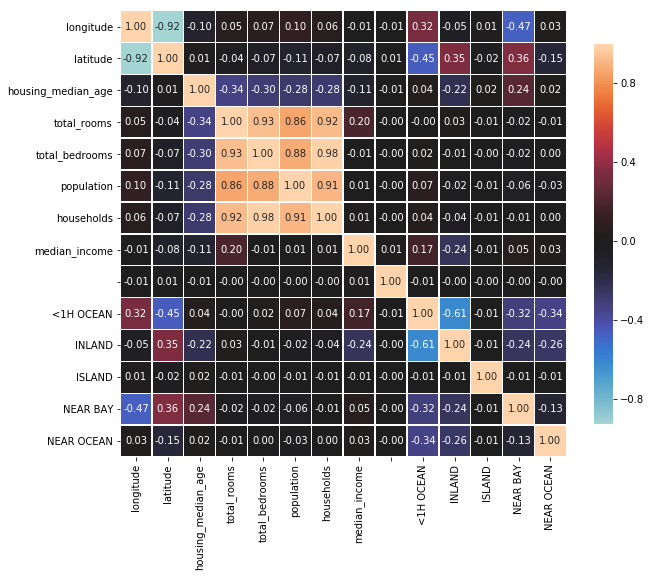

In [77]:
mapa_correlacao(feat_sem_norm)

In [90]:
df_sem_na.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', ' ', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')